<a href="https://colab.research.google.com/github/ashiqurrahmankhan21st/BreastCancer/blob/main/Breast_Cancer_V4_Original_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
#import keras_metrics
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import time

In [2]:
#original data
df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")
del df['id']
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()

In [4]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)
y_test_indi_ML = y_test.copy()
print("Original data : ",df.shape)
print("tarin         : ",X_train.shape)
print("test          : ",X_test.shape[0])
#print("validation    : ",X_val.shape[0])

Original data :  (569, 31)
tarin         :  (455, 30)
test          :  114


In [6]:
# SVM
st = time.time()
svm = SVC(C=0.1, gamma='auto', kernel = 'rbf',probability=True)
svm.fit(X_train, y_train)
send = time.time() - st
STr = svm.score(X_train, y_train)
STe = svm.score(X_test, y_test)
y_pred_svm = svm.predict(X_test)

In [7]:
#ANN
st = time.time()
tf.random.set_seed(123)
ANNmodel = Sequential()
ANNmodel.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
ANNmodel.add(Dense(15, activation='relu'))
ANNmodel.add(Dense(1, activation='sigmoid'))
ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy']) #tf.keras.metrics.Precision(), tf.keras.metrics.Recall()
ANNmodel.fit(X_train,y_train, batch_size = 128, epochs = 20, validation_split = 0.1)
aend = time.time() - st
ATr = ANNmodel.evaluate(X_train,y_train,verbose=0)[1]
ATe = ANNmodel.evaluate(X_test,y_test,verbose=0)[1]
y_pred_ANN = (ANNmodel.predict(X_test) > 0.5).astype("int32")

Epoch 1/20
4/4 [==============================] - 1s 90ms/step - loss: 0.6081 - accuracy: 0.6797 - val_loss: 0.6000 - val_accuracy: 0.7174
Epoch 2/20
4/4 [==============================] - 0s 22ms/step - loss: 0.5201 - accuracy: 0.7922 - val_loss: 0.5405 - val_accuracy: 0.7826
Epoch 3/20
4/4 [==============================] - 0s 21ms/step - loss: 0.4509 - accuracy: 0.8753 - val_loss: 0.4885 - val_accuracy: 0.8043
Epoch 4/20
4/4 [==============================] - 0s 15ms/step - loss: 0.3948 - accuracy: 0.8973 - val_loss: 0.4449 - val_accuracy: 0.8478
Epoch 5/20
4/4 [==============================] - 0s 15ms/step - loss: 0.3478 - accuracy: 0.9120 - val_loss: 0.4080 - val_accuracy: 0.8696
Epoch 6/20
4/4 [==============================] - 0s 21ms/step - loss: 0.3104 - accuracy: 0.9193 - val_loss: 0.3767 - val_accuracy: 0.8696
Epoch 7/20
4/4 [==============================] - 0s 16ms/step - loss: 0.2785 - accuracy: 0.9291 - val_loss: 0.3510 - val_accuracy: 0.8913
Epoch 8/20
4/4 [===========

In [8]:
ATr,ATe

(0.9604395627975464, 0.9736841917037964)

In [9]:
#XGBoost
st = time.time()
xgb = XGBClassifier(objective='binary:logistic',max_depth= 6,alpha= 10,learning_rate= 0.03,n_estimators=250)
xgb.fit(X_train, y_train)
xend = time.time() - st
y_pred_xgb = xgb.predict(X_test)
XTr = accuracy_score(y_train, xgb.predict(X_train))
XTe = accuracy_score(y_test, xgb.predict(X_test))
XTr,XTe

(0.9934065934065934, 0.9824561403508771)

In [10]:
#KNN
# Define the range of n_neighbors values to test
n_neighbors_values = [1,3, 5, 7, 9, 11]

best_accuracy = 0.0
best_n_neighbors = None

for n_neighbors in n_neighbors_values:
    print("Number of Neighbors:", n_neighbors)

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, knn.predict(X_train))
    test_accuracy = accuracy_score(y_test, knn.predict(X_test))

    print('KNN model train accuracy score: {0:0.4f}'.format(train_accuracy))
    print('KNN model test accuracy score: {0:0.4f}'.format(test_accuracy))
    print()

    # Check if the current test accuracy is better than the previous best
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_n_neighbors = n_neighbors
print("best neighbours: ", best_n_neighbors)

st = time.time()
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
kend = time.time() - st
KTr = accuracy_score(y_train, knn.predict(X_train))
KTe = accuracy_score(y_test, knn.predict(X_test))
y_pred_knn = knn.predict(X_test)
KTr,KTe


Number of Neighbors: 1
KNN model train accuracy score: 1.0000
KNN model test accuracy score: 0.9737

Number of Neighbors: 3
KNN model train accuracy score: 0.9802
KNN model test accuracy score: 0.9912

Number of Neighbors: 5
KNN model train accuracy score: 0.9692
KNN model test accuracy score: 0.9825

Number of Neighbors: 7
KNN model train accuracy score: 0.9692
KNN model test accuracy score: 0.9737

Number of Neighbors: 9
KNN model train accuracy score: 0.9692
KNN model test accuracy score: 0.9825

Number of Neighbors: 11
KNN model train accuracy score: 0.9714
KNN model test accuracy score: 0.9825

best neighbours:  3


(0.9802197802197802, 0.9912280701754386)

In [11]:
#RF
st = time.time()
rf = RandomForestClassifier(n_estimators= 500,max_features = 'sqrt', max_samples = 100, random_state=123)
rf.fit(X_train, y_train)
rend = time.time() - st
RTr = accuracy_score(y_train, rf.predict(X_train))
RTe = accuracy_score(y_test, rf.predict(X_test))
y_pred_rf = rf.predict(X_test)
RTr,RTe

(0.9758241758241758, 0.9912280701754386)

In [12]:
#LR
st = time.time()
lr = LogisticRegression(C= 0.1 , penalty='l1', solver='liblinear', max_iter = 1000, random_state=123)
lr.fit(X_train, y_train)
lend = time.time() - st
LTr = accuracy_score(y_train, lr.predict(X_train))
LTe = accuracy_score(y_test, lr.predict(X_test))
y_pred_lr = lr.predict(X_test)
LTr,LTe

(0.9802197802197802, 0.9736842105263158)

In [13]:
def CVal(ML):

  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")
  del df['id']

  s = 0
  e = round(df.shape[0]*.2)

  y_pred = []
  y_original = []

  for i in range(5):

    test_set  = df.iloc[s:e,:]
    train_set = df.drop(test_set.index)

    X_train = StandardScaler().fit_transform(train_set.drop(columns=['diagnosis'])).copy()
    y_train = encoder.fit_transform(train_set['diagnosis']).copy()
    X_test = StandardScaler().fit_transform(test_set.drop(columns=['diagnosis'])).copy()
    y_test = encoder.fit_transform(test_set['diagnosis']).copy()

    #svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')

    ML.fit(X_train, y_train)
    y_pred_ML = ML.predict(X_test)


    y_pred.append(y_pred_ML)
    y_original.append(y_test)

    s = e
    e = e + round(df.shape[0]*.2)
    if e-s < round(df.shape[0]*.2):
      e = df.shape[0]+1

  y_pred_final = []
  y_original_final = []

  try:
    for i in range(5):
      for j in range(round(df.shape[0]*.2)):
        y_pred_final.append(y_pred[i][j])
        y_original_final.append(y_original[i][j])
  except:
    pass
  return y_pred_final

In [14]:
def CValANN():

  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")
  del df['id']

  s = 0
  e = round(df.shape[0]*.2)

  y_pred = []
  y_original = []

  for i in range(5):

    test_set  = df.iloc[s:e,:]
    train_set = df.drop(test_set.index)

    X_train = StandardScaler().fit_transform(train_set.drop(columns=['diagnosis'])).copy()
    y_train = encoder.fit_transform(train_set['diagnosis']).copy()
    X_test = StandardScaler().fit_transform(test_set.drop(columns=['diagnosis'])).copy()
    y_test = encoder.fit_transform(test_set['diagnosis']).copy()

    #svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')
    tf.random.set_seed(123)
    ANNmodel = Sequential()
    ANNmodel.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
    ANNmodel.add(Dense(15, activation='relu'))
    ANNmodel.add(Dense(1, activation='sigmoid'))
    ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy']) #tf.keras.metrics.Precision(), tf.keras.metrics.Recall()
    ANNmodel.fit(X_train,y_train, batch_size = 128, epochs = 20, validation_split = 0.1)
    y_pred_ANN = (ANNmodel.predict(X_test) > 0.5).astype("int32")


    y_pred.append(y_pred_ANN)
    y_original.append(y_test)

    s = e
    e = e + round(df.shape[0]*.2)
    if e-s < round(df.shape[0]*.2):
      e = df.shape[0]

  y_pred_fina = []
  y_original_final = []

  try:
    for i in range(5):
      for j in range(round(df.shape[0]*.2)):
        y_pred_fina.append(y_pred[i][j])
        y_original_final.append(y_original[i][j])
  except:
    pass

  y_pred_final = []

  for i in range(len(y_pred_fina)):
    y_pred_final.append(y_pred_fina[i][0])

  return y_pred_final

In [15]:
newdata = pd.DataFrame({
    "SVM": CVal(SVC(C=0.1, gamma='auto', kernel = 'rbf'))
})
newdata["KNN"] = CVal(KNeighborsClassifier(n_neighbors=3))
newdata["RF"]  = CVal(RandomForestClassifier(n_estimators= 500,max_features = 'sqrt', max_samples = 100, random_state=123))
newdata['LR']  = CVal(LogisticRegression(C= 0.1 , penalty='l1', solver='liblinear', max_iter = 1000, random_state=123))
newdata["ANN"] = CValANN()
newdata["XGB"] = CVal(XGBClassifier(objective='binary:logistic',max_depth= 7,alpha= 10,learning_rate= 1,n_estimators=100))
newdata['y_test'] = encoder.fit_transform(df['diagnosis']).copy()

Epoch 1/20
4/4 [==============================] - 1s 78ms/step - loss: 0.5698 - accuracy: 0.7824 - val_loss: 0.5560 - val_accuracy: 0.8696
Epoch 2/20
4/4 [==============================] - 0s 15ms/step - loss: 0.5095 - accuracy: 0.8680 - val_loss: 0.4966 - val_accuracy: 0.9348
Epoch 3/20
4/4 [==============================] - 0s 15ms/step - loss: 0.4599 - accuracy: 0.8949 - val_loss: 0.4446 - val_accuracy: 0.9783
Epoch 4/20
4/4 [==============================] - 0s 21ms/step - loss: 0.4159 - accuracy: 0.9193 - val_loss: 0.3991 - val_accuracy: 0.9783
Epoch 5/20
4/4 [==============================] - 0s 20ms/step - loss: 0.3772 - accuracy: 0.9315 - val_loss: 0.3588 - val_accuracy: 0.9783
Epoch 6/20
4/4 [==============================] - 0s 14ms/step - loss: 0.3421 - accuracy: 0.9340 - val_loss: 0.3234 - val_accuracy: 0.9565
Epoch 7/20
4/4 [==============================] - 0s 14ms/step - loss: 0.3115 - accuracy: 0.9340 - val_loss: 0.2921 - val_accuracy: 0.9565
Epoch 8/20
4/4 [===========

In [16]:
newdata.head()

,SVM,KNN,RF,LR,ANN,XGB,y_test
0,1,1,1,1,1,0,1
1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1
4,1,1,1,1,1,0,1


In [17]:
# Define the DNN model
DNNX = newdata.drop(columns=['y_test']).copy()
DNNY = newdata.y_test.copy()
DX_train, DX_test, Dy_train, Dy_test = train_test_split(
    DNNX, DNNY, test_size=0.2, random_state=123)

st = time.time()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=DNNX.shape[1:]),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(DX_train, Dy_train, epochs=500, batch_size=64, validation_split=0.2)
dend = time.time() - st

Epoch 1/500
6/6 [==============================] - 2s 52ms/step - loss: 0.6920 - accuracy: 0.9066 - val_loss: 0.6912 - val_accuracy: 0.9121
Epoch 2/500
6/6 [==============================] - 0s 11ms/step - loss: 0.6905 - accuracy: 0.9286 - val_loss: 0.6897 - val_accuracy: 0.9231
Epoch 3/500
6/6 [==============================] - 0s 11ms/step - loss: 0.6887 - accuracy: 0.9313 - val_loss: 0.6876 - val_accuracy: 0.9231
Epoch 4/500
6/6 [==============================] - 0s 10ms/step - loss: 0.6863 - accuracy: 0.9368 - val_loss: 0.6848 - val_accuracy: 0.9121
Epoch 5/500
6/6 [==============================] - 0s 14ms/step - loss: 0.6831 - accuracy: 0.9396 - val_loss: 0.6810 - val_accuracy: 0.9121
Epoch 6/500
6/6 [==============================] - 0s 16ms/step - loss: 0.6789 - accuracy: 0.9341 - val_loss: 0.6754 - val_accuracy: 0.9011
Epoch 7/500
6/6 [==============================] - 0s 11ms/step - loss: 0.6728 - accuracy: 0.9286 - val_loss: 0.6676 - val_accuracy: 0.9011
Epoch 8/500
6/6 [===

In [18]:
#y_pred_DNN = (model.predict(DNNX) > 0.5).astype("int32")
DTr = model.evaluate(DX_train, Dy_train,verbose=0)[1]
DTe = model.evaluate(DX_test, Dy_test,verbose=0)[1]
DTr,DTe

(0.9472527503967285, 0.9210526347160339)

In [19]:
y_pred_DNN = (model.predict(DX_test) > 0.5).astype("int32")

4/4 [==============================] - 0s 4ms/step


In [20]:
acc = pd.DataFrame(
    {
    "SVM":[STr,STe],
    "KNN":[KTr,KTe],
    "RF" :[RTr,RTe],
    "LR" :[LTr,LTe],
    "ANN":[ATr,ATe],
    "XGB":[XTr,XTe],
    "DNN":[DTr,DTe]})
acc.index = ["train", "test"]
acc = acc.T
acc

,train,test
SVM,0.951648,0.956140
KNN,0.980220,0.991228
RF,0.975824,0.991228
LR,0.980220,0.973684
ANN,0.960440,0.973684
XGB,0.993407,0.982456
DNN,0.947253,0.921053


### **AutoML Individual and AutoML DNN**

In [21]:
#H2O AutoML

In [22]:
!pip install h2o
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()
from h2o.model.segment_models import H2OFrame
from h2o.automl import H2OAutoML
print("All Library Loaded")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.4-py2.py3-none-any.whl size=177697886 sha256=473cf63585f1e94c2e55133f2096c1553d94adc01f535b6e36c4e606b8126b28
  Stored in directory: /root/.cache/pip/wheels/43/f2/b0/5bb4d702a0467e82d77c45088db3eef25114c26b0eec8e7f6a
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgwnu0z28
  JVM stdout: /tmp/tmpgwnu0z28/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgwnu0z28/h2o_unknownUser_star

H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,2 months and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_rkm179
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


All Library Loaded


In [23]:
#train, valid = hdf.split_frame(ratios=[.8], seed=123)
#hdf = h2o.H2OFrame(df)
#hdf["diagnosis"] = hdf["diagnosis"].asfactor()
hy = "diagnosis"
hx = list(df.columns)
hx.remove(hy)
hdf  = df.copy()
hdf.iloc[:,1:] = StandardScaler().fit_transform(hdf.iloc[:,1:])
hdf.iloc[:,0] = LabelEncoder().fit_transform(hdf.iloc[:,0])
hdf.iloc[:,0] = hdf.iloc[:,0].astype('category')
train1, valid1 = train_test_split(hdf, test_size=0.2,random_state=123)
train = h2o.H2OFrame(train1)
valid = h2o.H2OFrame(valid1)
train["diagnosis"] = train["diagnosis"].asfactor()
valid["diagnosis"] = valid["diagnosis"].asfactor()

<ipython-input-23-460708a37676>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  hdf.iloc[:,0] = LabelEncoder().fit_transform(hdf.iloc[:,0])


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [24]:
st = time.time()
aml = H2OAutoML(max_models = 10, seed = 123, verbosity="info",
                nfolds=10, sort_metric='accuracy')
aml.train(x = hx, y = hy, training_frame = train,
          validation_frame = valid)
autoend = time.time() - st

AutoML progress: |
10:42:57.961: Project: AutoML_1_20230704_104257
10:42:57.964: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
10:42:57.966: Setting stopping tolerance adaptively based on the training frame: 0.04688072309384954
10:42:57.968: Build control seed: 123
10:42:57.969: training frame: Frame key: AutoML_1_20230704_104257_training_py_1_sid_a072    cols: 31    rows: 455  chunks: 1    size: 111919  checksum: -6999049652048799504
10:42:57.976: validation frame: Frame key: py_2_sid_a072    cols: 31    rows: 114  chunks: 1    size: 30037  checksum: 1244986154056216624
10:42:57.976: leaderboard frame: NULL
10:42:57.976: blending frame: NULL
10:42:57.976: response column: diagnosis
10:42:57.976: fold column: null
10:42:57.976: weights column: null
10:42:58.11: Loading executio

In [25]:
lb = aml.leaderboard
lb.head()

model_id,accuracy,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_1_20230704_104257,0.942857,0.984114,0.166379,0.979636,0.0539185,0.210251,0.0442054
XRT_1_AutoML_1_20230704_104257,0.96044,0.991619,0.116734,0.98782,0.0421609,0.184096,0.0338912
DRF_1_AutoML_1_20230704_104257,0.96044,0.987058,0.249487,0.985869,0.0421609,0.18258,0.0333355
XGBoost_2_AutoML_1_20230704_104257,0.962637,0.990394,0.11331,0.987678,0.0392369,0.174879,0.0305826
GBM_2_AutoML_1_20230704_104257,0.967033,0.994255,0.0933299,0.991681,0.0380426,0.162663,0.0264594
GBM_4_AutoML_1_20230704_104257,0.967033,0.993246,0.0998609,0.990397,0.0333889,0.170342,0.0290164
XGBoost_3_AutoML_1_20230704_104257,0.969231,0.992999,0.0965668,0.990609,0.0316284,0.161568,0.0261043
GBM_1_AutoML_1_20230704_104257,0.971429,0.994461,0.0911605,0.992401,0.0287044,0.158892,0.0252468
GBM_3_AutoML_1_20230704_104257,0.971429,0.994461,0.0902413,0.991937,0.027541,0.157908,0.0249349
GLM_1_AutoML_1_20230704_104257,0.978022,0.996479,0.0739483,0.994833,0.0269129,0.1449,0.0209961


In [26]:
best_model = aml.get_best_model()
best_model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20230704_104257


Model Summary: 
    number_of_trees
--  -----------------
    36

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.029074514855628383
RMSE: 0.17051250644931704
LogLoss: 0.12394929039565182
Mean Per-Class Error: 0.029270653158718393
AUC: 0.9940799769376494
AUCPR: 0.992056368504806
Gini: 0.9881599538752988

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4925362765789032
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      279  5    0.0176   (5.0/284.0)
1      7    164  0.0409   (7.0/171.0)
Total  286  169  0.0264   (12.0/455.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.492536     0.964706  38
max f2                       0.317989     0.971098  49
max f0point5                 0.514766     0.971395  37
max accuracy                 0.514766     0.973626  37
max precision                0.968002     1         0
max recall                   0.0588847    1         100
max specificity              0.968002     1         0
max absolute_mcc             0.492536     0.943696  38
max min_per_class_accuracy   0.402806     0.964912  42
max mean_per_class_accuracy  0.492536     0.970729  38
max tns                      0.968002     284       0
max fns                      0.968002     110       0
max fps                      0.0148769    284       134
max tps                      0.0588847    171       100
max tnr                      0.968002     1         0
max fnr                      0.968002     0.643275  0
max fpr                      0.0148769    1         134
max tpr                      0.0588847    1         100

Gains/Lift Table: Avg response rate: 37.58 %, avg score: 37.29 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.134066                    0.968002           2.66082    2.66082            1                0.968002   1                           0.968002            0.356725        0.356725                   166.082   166.082            0.356725
2        0.162637                    0.957612           2.66082    2.66082            1                0.957612   1                           0.966177            0.0760234       0.432749                   166.082   166.082            0.432749
3        0.2                         0.950501           2.66082    2.66082            1                0.953488   1                           0.963806            0.0994152       0.532164                   166.082   166.082            0.532164
4        0.301099                    0.807568           2.66082    2.66082            1                0.897179   1                           0.941435            0.269006        0.80117                    166.082   166.082            0.80117
5        0.4                         0.314704           1.83301    2.45614            0.688889         0.582323   0.923077                    0.852644            0.181287        0.982456                   83.3008   145.614            0.93316
6        0.501099                    0.076693           0.0578439  1.97227            0.0217391        0.161579   0.741228                    0.713218            0.00584795      0.988304                   -94.2156  97.2274            0.780558
7        0.624176                    0.0503081          0.0950292  1.60211            0.0357143        0.058398  

In [27]:
best_model.model_performance(train).accuracy()

[[0.5147656202316284, 0.9736263736263736]]

In [28]:
best_model = aml.get_best_model()
HATr  = best_model.model_performance(train)
HATe  = best_model.model_performance(valid)

In [29]:
y_pred_h2o = pd.DataFrame(h2o.as_list(best_model.predict(valid)))['predict']
y_test_h2o = np.array(valid1['diagnosis']).copy()

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [30]:
#SFOLD DATA AUTOML
#strain, svalid = shdf.split_frame(ratios=[.8], seed=123)
shdf  = newdata.copy()
#shdf['y_test'] = shdf['y_test'].replace(0,"B")
#shdf['y_test'] = shdf['y_test'].replace(1,"M")
shy = "y_test"
shx = list(shdf.columns)
shx.remove(shy)

shdf.iloc[:,0:6] = StandardScaler().fit_transform(shdf.iloc[:,0:6])
#shdf.iloc[:,-1] = LabelEncoder().fit_transform(shdf.iloc[:,-1])
strain1, svalid1 = train_test_split(shdf, test_size=0.2,random_state=123)
strain = h2o.H2OFrame(strain1)
svalid = h2o.H2OFrame(svalid1)
strain["y_test"] = strain["y_test"].asfactor()
svalid["y_test"] = svalid["y_test"].asfactor()

st = time.time()
saml = H2OAutoML(max_models = 10, seed = 123, verbosity="info", nfolds=10, sort_metric='accuracy')
saml.train(x = shx, y = shy, training_frame = strain, validation_frame = svalid)
sautoend = time.time() - st
sbest_model = saml.get_best_model()
sHATr  = sbest_model.model_performance(strain)
sHATe  = sbest_model.model_performance(svalid)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
10:44:39.20: Project: AutoML_2_20230704_104439
10:44:39.20: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
10:44:39.20: Setting stopping tolerance adaptively based on the training frame: 0.04688072309384954
10:44:39.20: Build control seed: 123
10:44:39.21: training frame: Frame key: AutoML_2_20230704_104439_training_py_11_sid_a072    cols: 7    rows: 455  chunks: 1    size: 6691  checksum: -4836358475592077104
10:44:39.21: validation frame: Frame key: py_12_sid_a072    cols: 7    rows: 114  chunks: 1    size: 2553  checksum: -5131178475415970944
10:44:39.21: leaderboard fra

In [31]:
y_pred_sh2o = pd.DataFrame(h2o.as_list(sbest_model.predict(svalid)))['predict']
y_test_sh2o = np.array(svalid1['y_test']).copy()

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


<BarContainer object of 7 artists>

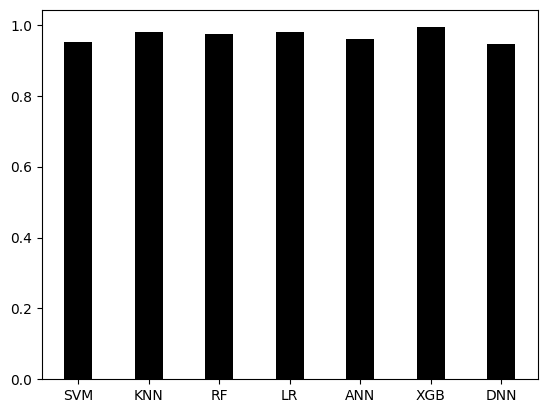

In [32]:
import matplotlib.pyplot as plt
plt.bar(acc.index, acc['train'], color ='black',width = 0.4)

In [33]:
m = [ANNmodel, model, knn, lr, rf, svm, xgb, best_model]

label = ["ArtificialNeuralNetwork", 'DeepNeuralNetwork',
         'KNearestNeighborsClassifier', 'LogisticRegression',
         'RandomForestClassifier', 'SupportVectorClassifier',
         'XGBoost', type(best_model).__name__, type(sbest_model).__name__ ]

acc = pd.DataFrame(
    {
    "ANN":[ATr,ATe],
    "DNN":[DTr,DTe],
    "KNN":[KTr,KTe],
    "LR" :[LTr,LTe],
    "RF" :[RTr,RTe],
    "SVM":[STr,STe],
    "XGB":[XTr,XTe],
    "H_OD":[HATr.accuracy()[0][1],HATe.accuracy()[0][1]],
    "H_SOD":[sHATr.accuracy()[0][1],sHATe.accuracy()[0][1]]
    })
acc.index = ["train", "test"]
acc = acc.T
acc['Model'] = label

acc = acc[['Model', 'train', 'test']]
acc['avg'] = round((acc['train'] + acc['test'])/2, 6)
acc[acc["avg"] == acc["avg"].max()]
acc['BestModel'] = 0
for i in range(len(acc)):
  if acc['avg'][i] >= 90 and acc['avg'][i] < acc['avg'].max():
    acc.iloc[i,-1] = "good"
  elif acc['avg'][i] == acc['avg'].max():
    acc.iloc[i,-1] = "best"
  else:
    acc.iloc[i,-1] = "not good"

acc["Precision"] = np.zeros(len(acc))
acc["Recall"]    = np.zeros(len(acc))
acc["F1_Score"]  = np.zeros(len(acc))



In [34]:
y_pred_ANNn = []
y_pred_DNNn = []
for i in range(len(y_pred_ANN)):
  y_pred_ANNn.append(y_pred_ANN[i][0])
  y_pred_DNNn.append(y_pred_DNN[i][0])

In [35]:
pred = [np.array(y_pred_ANNn), np.array(y_pred_DNNn), y_pred_knn,
        y_pred_lr, y_pred_rf,
        y_pred_svm, y_pred_xgb, y_pred_h2o, y_pred_sh2o]

tes  = [y_test_indi_ML, np.array(Dy_test), y_test_indi_ML, y_test_indi_ML,
        y_test_indi_ML, y_test_indi_ML, y_test_indi_ML,
        y_test_h2o.copy(), y_test_sh2o.copy()]

In [36]:
for i in range(len(pred)):
  p,r,f,_ = precision_recall_fscore_support(tes[i], pred[i],
                                            average='macro')
  acc.iloc[i,5]= p
  acc.iloc[i,6]= r
  acc.iloc[i,7]= f
  p = 0
  r = 0
  f = 0
acc

,Model,train,test,avg,BestModel,Precision,Recall,F1_Score
ANN,ArtificialNeuralNetwork,0.960440,0.973684,0.967062,not good,0.980263,0.963415,0.970946
DNN,DeepNeuralNetwork,0.947253,0.921053,0.934153,not good,0.927350,0.900936,0.911757
KNN,KNearestNeighborsClassifier,0.980220,0.991228,0.985724,not good,0.993243,0.987805,0.990426
LR,LogisticRegression,0.980220,0.973684,0.976952,not good,0.980263,0.963415,0.970946
RF,RandomForestClassifier,0.975824,0.991228,0.983526,not good,0.993243,0.987805,0.990426
SVM,SupportVectorClassifier,0.951648,0.956140,0.953894,not good,0.967949,0.939024,0.950976
XGB,XGBoost,0.993407,0.982456,0.987931,best,0.980956,0.980956,0.980956
H_OD,H2OXGBoostEstimator,0.973626,0.964912,0.969269,not good,0.958074,0.967257,0.962302
H_SOD,H2OXGBoostEstimator,0.938462,0.912281,0.925371,not good,0.896959,0.892583,0.894684


<BarContainer object of 9 artists>

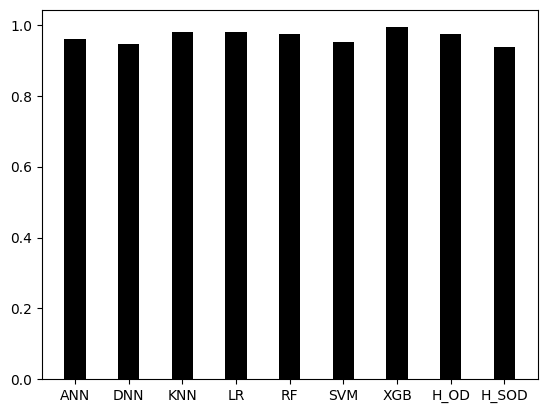

In [37]:
import matplotlib.pyplot as plt
plt.bar(acc.index, acc['train'], color ='black',width = 0.4)

In [38]:
from sklearn.metrics import roc_auc_score, roc_curve

In [39]:
m = [ANNmodel, model, knn, lr, rf, svm, xgb, best_model]

In [40]:
#encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)
y_test_indi_ML = y_test.copy()

In [41]:
from sklearn import metrics

4/4 [==============================] - 0s 4ms/step
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


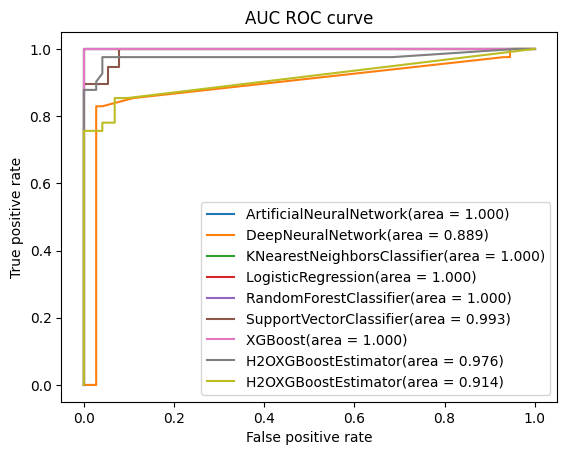

In [42]:
plt.figure(1)
plt.rcParams["figure.figsize"] = [10, 5]

y_pred = ANNmodel.predict(X_test).ravel()
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[0]) + '(area = {:.3f})'.format(auc))

y_pred = model.predict(DX_test).ravel()
y_test = Dy_test.copy()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[1]) + '(area = {:.3f})'.format(auc))

y_pred = knn.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[2]) + '(area = {:.3f})'.format(auc))

y_pred = lr.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[3]) + '(area = {:.3f})'.format(auc))

y_pred = rf.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[4]) + '(area = {:.3f})'.format(auc))

y_pred = svm.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[5]) + '(area = {:.3f})'.format(auc))

y_pred = xgb.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[6]) + '(area = {:.3f})'.format(auc))

y_pred = pd.DataFrame(h2o.as_list(best_model.predict(valid)))
y_test = h2o.as_list(valid['diagnosis'])
fpr, tpr, thresholds = roc_curve(y_test, y_pred["p1"])
auc = metrics.roc_auc_score(y_test, y_pred["p1"])
plt.plot(fpr, tpr,label=type(best_model).__name__ + '(area = {:.3f})'.format(auc))

y_pred = pd.DataFrame(h2o.as_list(sbest_model.predict(svalid)))
y_test = h2o.as_list(svalid['y_test'])
fpr, tpr, thresholds = roc_curve(y_test, y_pred["p1"])
auc = metrics.roc_auc_score(y_test, y_pred["p1"])
plt.plot(fpr, tpr,label=type(sbest_model).__name__ + '(area = {:.3f})'.format(auc))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC ROC curve')
plt.legend(loc='best')
plt.show()

In [43]:
tm = [aend,dend,kend,lend,rend,send,xend,autoend,sautoend]

In [44]:
acc['time'] = 0

In [45]:
acc['time'] = tm

In [46]:
acc

,Model,train,test,avg,BestModel,Precision,Recall,F1_Score,time
ANN,ArtificialNeuralNetwork,0.960440,0.973684,0.967062,not good,0.980263,0.963415,0.970946,3.653083
DNN,DeepNeuralNetwork,0.947253,0.921053,0.934153,not good,0.927350,0.900936,0.911757,83.814371
KNN,KNearestNeighborsClassifier,0.980220,0.991228,0.985724,not good,0.993243,0.987805,0.990426,0.001131
LR,LogisticRegression,0.980220,0.973684,0.976952,not good,0.980263,0.963415,0.970946,0.005294
RF,RandomForestClassifier,0.975824,0.991228,0.983526,not good,0.993243,0.987805,0.990426,0.927072
SVM,SupportVectorClassifier,0.951648,0.956140,0.953894,not good,0.967949,0.939024,0.950976,0.046389
XGB,XGBoost,0.993407,0.982456,0.987931,best,0.980956,0.980956,0.980956,1.767434
H_OD,H2OXGBoostEstimator,0.973626,0.964912,0.969269,not good,0.958074,0.967257,0.962302,98.671937
H_SOD,H2OXGBoostEstimator,0.938462,0.912281,0.925371,not good,0.896959,0.892583,0.894684,31.444488
